### Big Picture and Task Explanation with a potential connection with how it could be related to projects at Reyes Holding 

Analysis of flight data (such as arrival delays, weather  impact) and possible forecast is a standard problem. In this project, Twitter data  sentiment analysis in a particular geographical region (say India) during the year 2019 is proposed to be used as augmented data and possible correlation between  flight delay and the related Twitter data sentiments are studied using Random Forest Regression.  

Findings, though very preliminary, indicate that this idea could be used to forecast demand in Beverages (or Food) in certain geographical regions and how it may get impacted by a major event such as a Football game or a major accident or a festival using augmented Twitter data sentiments.

### This file contains 3 major parts:-
1) Twitter-less analysis
2) Twitter-Augmented analysis
3) Twitter data preprocessing (in the separate notebook called "twitter_analysis")
4) Results (mse comparison) towards the end of the notebook in a dataframe

Comments have been included for better understanding of the reader

All the data files needed are enclosed in the same folder. 



In [176]:
# Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest ,mutual_info_regression

import warnings
warnings.filterwarnings("ignore")

Data Source: Self, Kaggle \
Flight Data came from Kaggle and Twitter Data was self-collected with the help of Twitter API

In [177]:
# Reading the delay data comprising of weather conditions and airport conditions for all airlines in India throughout years 2018-2020
# This also includes the dates when the data was recorded/observed.
df_temp = pd.read_csv("Final.csv") 
extracted_col = df_temp["Date"]
df = pd.read_csv("fit.csv") 
df=df.join(extracted_col)

### Visualizations and Analysis

#### Our target variable is Arrival Delay or A_Delay

In [178]:
df.head()

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,BOM-DEL,CCU-DEL,DEL-HYD,Air Asia,Air India,Go Air,Indigo,Spicejet,Vistara,Date
0,7.5,8.6,9.2,7.29,6.2,9.0,8.0,79.0,-16.0,7.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15-04-2019
1,7.5,8.6,9.2,7.29,6.2,9.0,3.0,81.0,-20.0,7.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16-04-2019
2,7.5,8.6,9.2,7.29,6.2,9.0,2.0,90.0,-12.0,7.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,17-04-2019
3,7.5,8.6,9.2,7.29,6.2,9.0,3.0,77.0,-23.0,7.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18-04-2019
4,7.5,8.6,9.2,7.29,6.2,9.0,15.0,78.0,-11.0,7.4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19-04-2019


In [179]:
print("Number of Features: ",len(df.columns)-1)
print("Target Variable: Arrival Delay (A_Delay)" )
print("Shape: ", df.shape)

Number of Features:  46
Target Variable: Arrival Delay (A_Delay)
Shape:  (14952, 47)


### Basic Preprocessing

In [180]:
# Checking for missing values and removing them
df.isnull().sum()
df.dropna()
# We only keep the airline = Indigo 
df_indigo=df[df['Indigo'] == 1]
# Splitting the Date into 3 columns for future mapping of twitter data on Month and Day
df_indigo[["day", "month", "year"]] = df_indigo["Date"].str.split("-", expand = True)
# Converting to int
df_indigo['year'] = df_indigo['year'].astype(int)
df_indigo['day'] = df_indigo['day'].astype(int)
df_indigo['month'] = df_indigo['month'].astype(int)
# Year = 2019
df_indigo=df_indigo[df_indigo['year'] == 2019]
# Dropping columns - irrelevant or out of scope of this project
df_indigo=df_indigo.drop(['BLR-BOM', 'BLR-DEL','BOM-DEL', 'CCU-DEL', 'DEL-HYD','Air Asia','Air India','Go Air','Indigo','Spicejet','Vistara','Date','year'], axis=1)

df_indigo
# A temp dataframe without date for analysis
#df_without_date = df.drop(['Date'], axis=1)
#df_without_date

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,day,month
8336,7.50,8.6,9.2,7.29,6.2,9.0,37.0,83.0,-1.0,7.9,...,32.0,0.0,1018.0,25.0,10.0,67.0,9.0,6.0,1,1
8337,7.50,8.6,9.2,7.29,6.2,9.0,6.0,83.0,-26.0,7.9,...,46.0,0.0,1015.0,24.0,10.0,22.0,11.0,6.0,2,1
8338,7.50,8.6,9.2,7.29,6.2,9.0,18.0,80.0,-18.0,7.9,...,41.0,0.0,1011.0,27.0,10.0,63.0,8.0,6.0,3,1
8339,7.50,8.6,9.2,7.29,6.2,9.0,5.0,77.0,-33.0,7.9,...,69.0,0.0,1011.0,30.0,10.0,301.0,7.0,6.0,4,1
8340,7.50,8.6,9.2,7.29,6.2,9.0,103.0,76.0,64.0,7.9,...,79.0,0.0,1007.0,31.0,10.0,264.0,4.0,7.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,7.99,7.3,9.1,8.27,7.8,9.0,1.0,100.0,-28.0,7.9,...,85.0,0.0,1013.0,20.0,10.0,101.0,10.0,6.0,27,12
10269,7.99,7.3,9.1,8.27,7.8,9.0,49.0,100.0,20.0,7.9,...,62.0,0.0,1015.0,18.0,10.0,56.0,13.0,7.0,28,12
10270,7.99,7.3,9.1,8.27,7.8,9.0,15.0,106.0,-9.0,7.9,...,76.0,0.0,1015.0,17.0,10.0,96.0,11.0,6.0,29,12
10271,7.99,7.3,9.1,8.27,7.8,9.0,79.0,112.0,61.0,7.9,...,68.0,0.0,1015.0,20.0,10.0,129.0,15.0,8.0,30,12


##### Outlier Detection and Removal

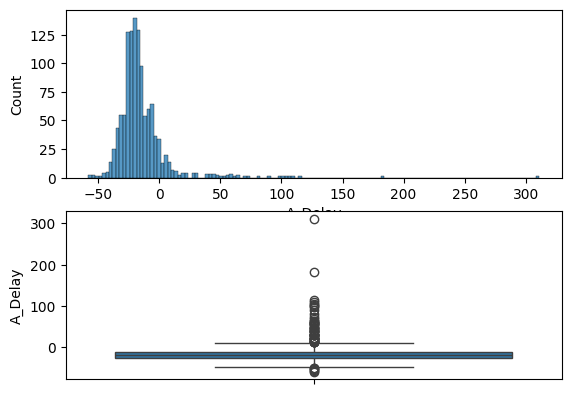

In [181]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.histplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)
#df['A_Delay']=np.where(df['A_Delay']>=40,df['A_Delay'].median(),df['A_Delay'])
plot(df_indigo,'A_Delay')

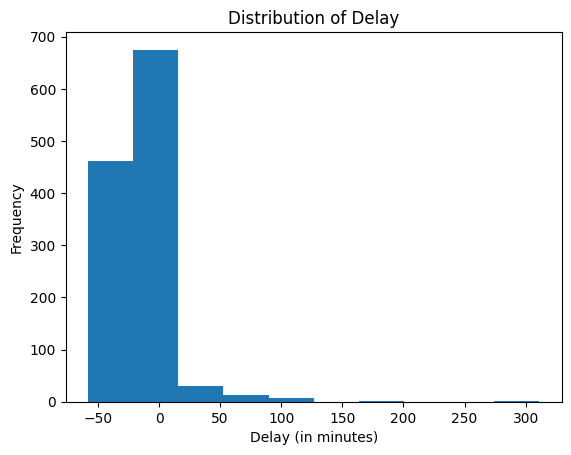

In [182]:
plt.hist(df_indigo['A_Delay'])
plt.title("Distribution of Delay")
plt.xlabel("Delay (in minutes)")
plt.ylabel("Frequency")
plt.show()

Truncate points after -80 less than and greater than 125 \
Implies that chances that the flight will be delayed beyong 125 mins or arriving earlier than 80 mins are bleak

In [183]:
# Outlier Removal
df_indigo = df_indigo[df_indigo['A_Delay'] > -80]
df_indigo = df_indigo[df_indigo['A_Delay'] < 125]

In [184]:
df_indigo

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,day,month
8336,7.50,8.6,9.2,7.29,6.2,9.0,37.0,83.0,-1.0,7.9,...,32.0,0.0,1018.0,25.0,10.0,67.0,9.0,6.0,1,1
8337,7.50,8.6,9.2,7.29,6.2,9.0,6.0,83.0,-26.0,7.9,...,46.0,0.0,1015.0,24.0,10.0,22.0,11.0,6.0,2,1
8338,7.50,8.6,9.2,7.29,6.2,9.0,18.0,80.0,-18.0,7.9,...,41.0,0.0,1011.0,27.0,10.0,63.0,8.0,6.0,3,1
8339,7.50,8.6,9.2,7.29,6.2,9.0,5.0,77.0,-33.0,7.9,...,69.0,0.0,1011.0,30.0,10.0,301.0,7.0,6.0,4,1
8340,7.50,8.6,9.2,7.29,6.2,9.0,103.0,76.0,64.0,7.9,...,79.0,0.0,1007.0,31.0,10.0,264.0,4.0,7.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,7.99,7.3,9.1,8.27,7.8,9.0,1.0,100.0,-28.0,7.9,...,85.0,0.0,1013.0,20.0,10.0,101.0,10.0,6.0,27,12
10269,7.99,7.3,9.1,8.27,7.8,9.0,49.0,100.0,20.0,7.9,...,62.0,0.0,1015.0,18.0,10.0,56.0,13.0,7.0,28,12
10270,7.99,7.3,9.1,8.27,7.8,9.0,15.0,106.0,-9.0,7.9,...,76.0,0.0,1015.0,17.0,10.0,96.0,11.0,6.0,29,12
10271,7.99,7.3,9.1,8.27,7.8,9.0,79.0,112.0,61.0,7.9,...,68.0,0.0,1015.0,20.0,10.0,129.0,15.0,8.0,30,12


Feature Selection and Engineering

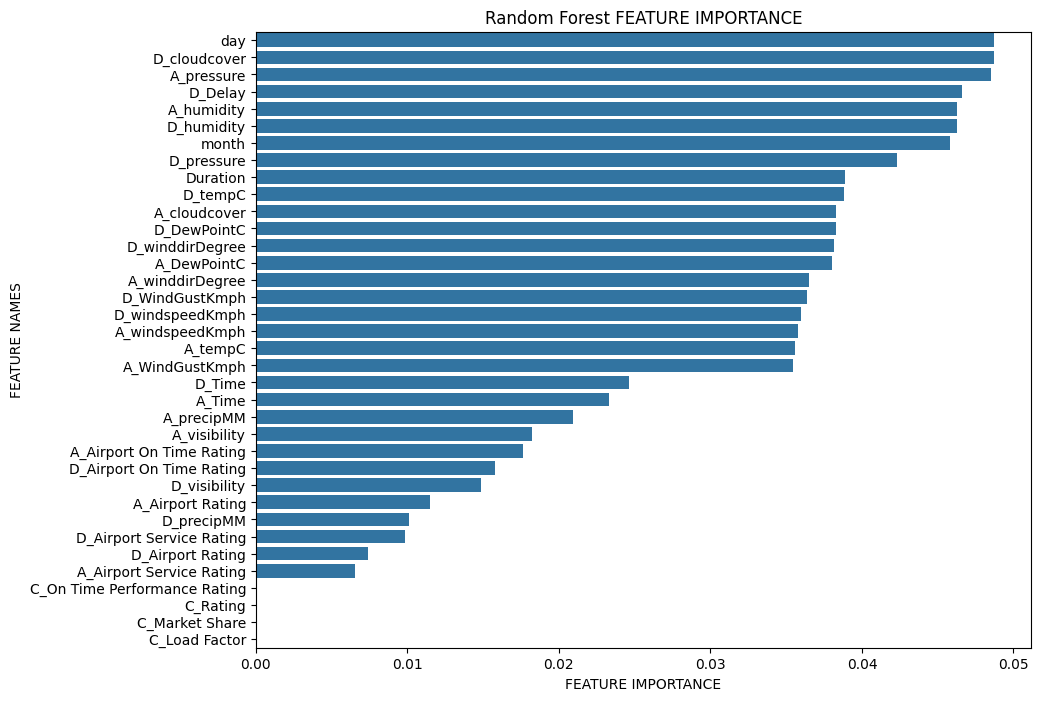

In [185]:
#Random Forest learns the importance of features by assessing their contribution to the overall predictive performance of the ensemble. 
#Features that consistently lead to better splits and improve the model's accuracy or purity are assigned higher importance values. 
#These importance values are then accessible through the feature_importances_ attribute after the model has been trained.

X = df_indigo.drop(['A_Delay'], axis =1)
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

# Calling the functions
#plot_feature_importance(model.feature_importances_,X.columns,'ExtraTreesClassifier') 
plot_feature_importance(model.feature_importances_,X.columns,'Random Forest')


##### Important - We observe that D_delay is has the most affect of A_Delay, our target. We can attribute this to data leakage and remove D_Delay for more accurate predictions


In [189]:
# Removing Data Leakage
data = df_indigo.drop("D_Delay",axis = 1)

In [190]:
data

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,Duration,A_Delay,C_Rating,C_Market Share,...,A_humidity,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,day,month
8336,7.50,8.6,9.2,7.29,6.2,9.0,83.0,-1.0,7.9,39.7,...,32.0,0.0,1018.0,25.0,10.0,67.0,9.0,6.0,1,1
8337,7.50,8.6,9.2,7.29,6.2,9.0,83.0,-26.0,7.9,39.7,...,46.0,0.0,1015.0,24.0,10.0,22.0,11.0,6.0,2,1
8338,7.50,8.6,9.2,7.29,6.2,9.0,80.0,-18.0,7.9,39.7,...,41.0,0.0,1011.0,27.0,10.0,63.0,8.0,6.0,3,1
8339,7.50,8.6,9.2,7.29,6.2,9.0,77.0,-33.0,7.9,39.7,...,69.0,0.0,1011.0,30.0,10.0,301.0,7.0,6.0,4,1
8340,7.50,8.6,9.2,7.29,6.2,9.0,76.0,64.0,7.9,39.7,...,79.0,0.0,1007.0,31.0,10.0,264.0,4.0,7.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10268,7.99,7.3,9.1,8.27,7.8,9.0,100.0,-28.0,7.9,39.7,...,85.0,0.0,1013.0,20.0,10.0,101.0,10.0,6.0,27,12
10269,7.99,7.3,9.1,8.27,7.8,9.0,100.0,20.0,7.9,39.7,...,62.0,0.0,1015.0,18.0,10.0,56.0,13.0,7.0,28,12
10270,7.99,7.3,9.1,8.27,7.8,9.0,106.0,-9.0,7.9,39.7,...,76.0,0.0,1015.0,17.0,10.0,96.0,11.0,6.0,29,12
10271,7.99,7.3,9.1,8.27,7.8,9.0,112.0,61.0,7.9,39.7,...,68.0,0.0,1015.0,20.0,10.0,129.0,15.0,8.0,30,12


#### Splitting and Forecasting

Set 1: Original dataset without any feature or target transformations. \
Set 2: Polynomial features of degree 2 are created from the original features, and the target remains unchanged. \
Set 3: The target variable is normalized using the Yeo-Johnson Power Transformation, while the features remain unchanged. \
Set 4: Polynomial features of degree 2 are created from the original features, and the target is normalized using the Yeo-Johnson Power Transformation. \
These sets allow you to experiment with different data transformations and analyze their impact on model performance or explore the distributional properties of the data.

A Yeo-Johnson Power Transformation works similarly to the Box-Cox transformation. \
Essentially, the Yeo-Johnson Power Transformation inflates low variance data and deflates high variance data to create a more uniform dataset. (reduces skweness)

In [191]:
# WE MAKE 4 POSSIBLE SETS OF DATA
# 1 - NO CHANGE IN FEATURES, NO CHANGE IN TARGET 
# 2 - POLYNOMIAL FEATURES OF DEGREE 2, NO CHANGE IN TARGET
# 3 - NO CHANGE IN FEATURES, TARGET NORMALIZED
# 4 - POLYNOMIAL FEATURES OF DEGREE 2, TARGET NORMALIZED

PT = PowerTransformer(method = "yeo-johnson")
X_train,X_test,y_train,y_test = tts(df_indigo.drop('A_Delay', axis = 1),df_indigo['A_Delay'],test_size = 0.3,random_state = 1)
print(np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test))

PT.fit(y_train.to_numpy().reshape(-1,1))
lamb = PT.lambdas_

yt_train = PT.transform(y_train.to_numpy().reshape(-1,1))
yt_test = PT.transform(y_test.to_numpy().reshape(-1,1))

PF = PolynomialFeatures(2);

data_p = PF.fit_transform(df_indigo.drop('A_Delay',axis = 1))
Xp_train,Xp_test,y_train,y_test = tts(data_p,df_indigo['A_Delay'],test_size = 0.3,random_state = 1)

(830, 36) (356, 36) (830,) (356,)


In [192]:
# Printing all shapes to be sure!
print(X_train.shape) # NO CHANGE APPLIED
print(X_test.shape)  # NO CHANGE APPLIED
print(y_train.shape) # NO CHANGE APPLIED
print(y_test.shape)  # NO CHANGE APPLIED
print(Xp_train.shape)# POLYNOMIAL FEATURES
print(Xp_test.shape) # POLYNOMIAL FEATURES
print(yt_train.shape)# TARGET NORMALIZED
print(yt_test.shape) # TARGET NORMALIZED

(830, 36)
(356, 36)
(830,)
(356,)
(830, 703)
(356, 703)
(830, 1)
(356, 1)


In [193]:
# Applying random forest regression on the data.
# Evaluation Metric used is mse.
n_feat=37

# NO CHANGE DATA
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features =n_feat,n_jobs = -1, random_state = 1)
RFR.fit(X_train,y_train)
print(mean_squared_error(RFR.predict(X_train),y_train))
print(mean_squared_error(RFR.predict(X_test),y_test))

# TARGET NORMALIZED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(X_train,yt_train)
print(mean_squared_error(RFR.predict(X_train),yt_train))
print(mean_squared_error(RFR.predict(X_test),yt_test))

# POLYNOMIAL FEATURES AND NO NORMALIZATION OF TARGET
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,y_train)
print(mean_squared_error(RFR.predict(Xp_train),y_train))
print(mean_squared_error(RFR.predict(Xp_test),y_test))

# BOTH POLYNOMIAL AND NORMALIZATION APPLIED
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(Xp_train,yt_train)
print(mean_squared_error(RFR.predict(Xp_train),yt_train))
print(mean_squared_error(RFR.predict(Xp_test),yt_test))


11.178606340632907
33.3011662741333
0.06227032036357092
0.17121610414011473
11.215363483950364
36.323958142468776
0.05693434636080077
0.17575124084002175


In [194]:
# SELECTING BEST 60 FEATURES BY SelecKBest for our polynomial cases with over 100 features
from sklearn.feature_selection import SelectKBest ,mutual_info_regression

SKB = SelectKBest(mutual_info_regression,k=60)

SKB.fit(Xp_train,y_train)
Xp60_train = SKB.transform(Xp_train)
Xp60_test = SKB.transform(Xp_test)

SKB.fit(Xp_train,yt_train)
Xpt60_train = SKB.transform(Xp_train)
Xpt60_test = SKB.transform(Xp_test)

print(Xp60_train.shape)
print(Xp60_test.shape)
print(Xpt60_train.shape)
print(Xpt60_test.shape)

(830, 60)
(356, 60)
(830, 60)
(356, 60)


In [195]:
print(Xp60_train.shape)
print(Xp60_test.shape)
(Xp60_train == Xpt60_train)

(830, 60)
(356, 60)


array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [196]:
# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITHOUT NORMALIZATION
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(Xp60_train,y_train)
mse_p60_train_randomforest=mean_squared_error(RFR.predict(Xp60_train),y_train)
mse_p60_test_randomforest = mean_squared_error(RFR.predict(Xp60_test),y_test)

# POLYNOMIAL REDUCED TO 60 FEATURES AND Y WITH NORMALIZATION
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(Xpt60_train,yt_train)
mse_pt60_train_randomforest=mean_squared_error(RFR.predict(Xpt60_train),yt_train)
mse_pt60_train_randomforest = mean_squared_error(RFR.predict(Xpt60_test),yt_test)

In [197]:
# TRYING SUPPORT VECTOR MACHINE ON THE DATA (polynomial, normalized target since it has the lowest mse)
svr = SVR(kernel = 'poly',degree = 1, C = 1.0 , max_iter = 10000)

In [198]:
svr.fit(Xp60_train,yt_train)
print(mean_squared_error(svr.predict(Xp60_train),yt_train))
print(mean_squared_error(svr.predict(Xp60_test),yt_test))


0.5685345941979602
0.5215952781694451


In [199]:
# Use predicted SVR values as features in oue Random Forest Regression 
# This technique is known as stacking or ensemble stacking. (Basically an extra level of efforts to check and see if mse improves)
# This can improve the predictive power by capturing the patterns or relationships that the SVR model has learned from the data but may not have 
#been fully captured by the Random Forest model. 
# The SVR predictions can be seen as the "residuals" or unexplained variance that the Random Forest model can then try to capture.

X_train_svm = np.concatenate([Xp60_train,svr.predict(Xp60_train).reshape(-1,1)],axis = 1)
X_test_svm = np.concatenate([Xp60_test,svr.predict(Xp60_test).reshape(-1,1)],axis = 1)

data_svm = np.concatenate([X_train_svm,X_test_svm],axis = 0)

In [200]:
# TRAINING RFR ON THE MODIFIED DATASET
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(X_train_svm,yt_train)
print(mean_squared_error(RFR.predict(X_train_svm),yt_train))
print(mean_squared_error(RFR.predict(X_test_svm),yt_test))

0.09294992061369114
0.16994961131353623


In [201]:
g1 = PT.inverse_transform(RFR.predict(X_test_svm).reshape(-1,1)).reshape(-1,)
g2 = PT.inverse_transform(yt_test.reshape(-1,1)).reshape(-1,)

Text(0, 0.5, 'Actual')

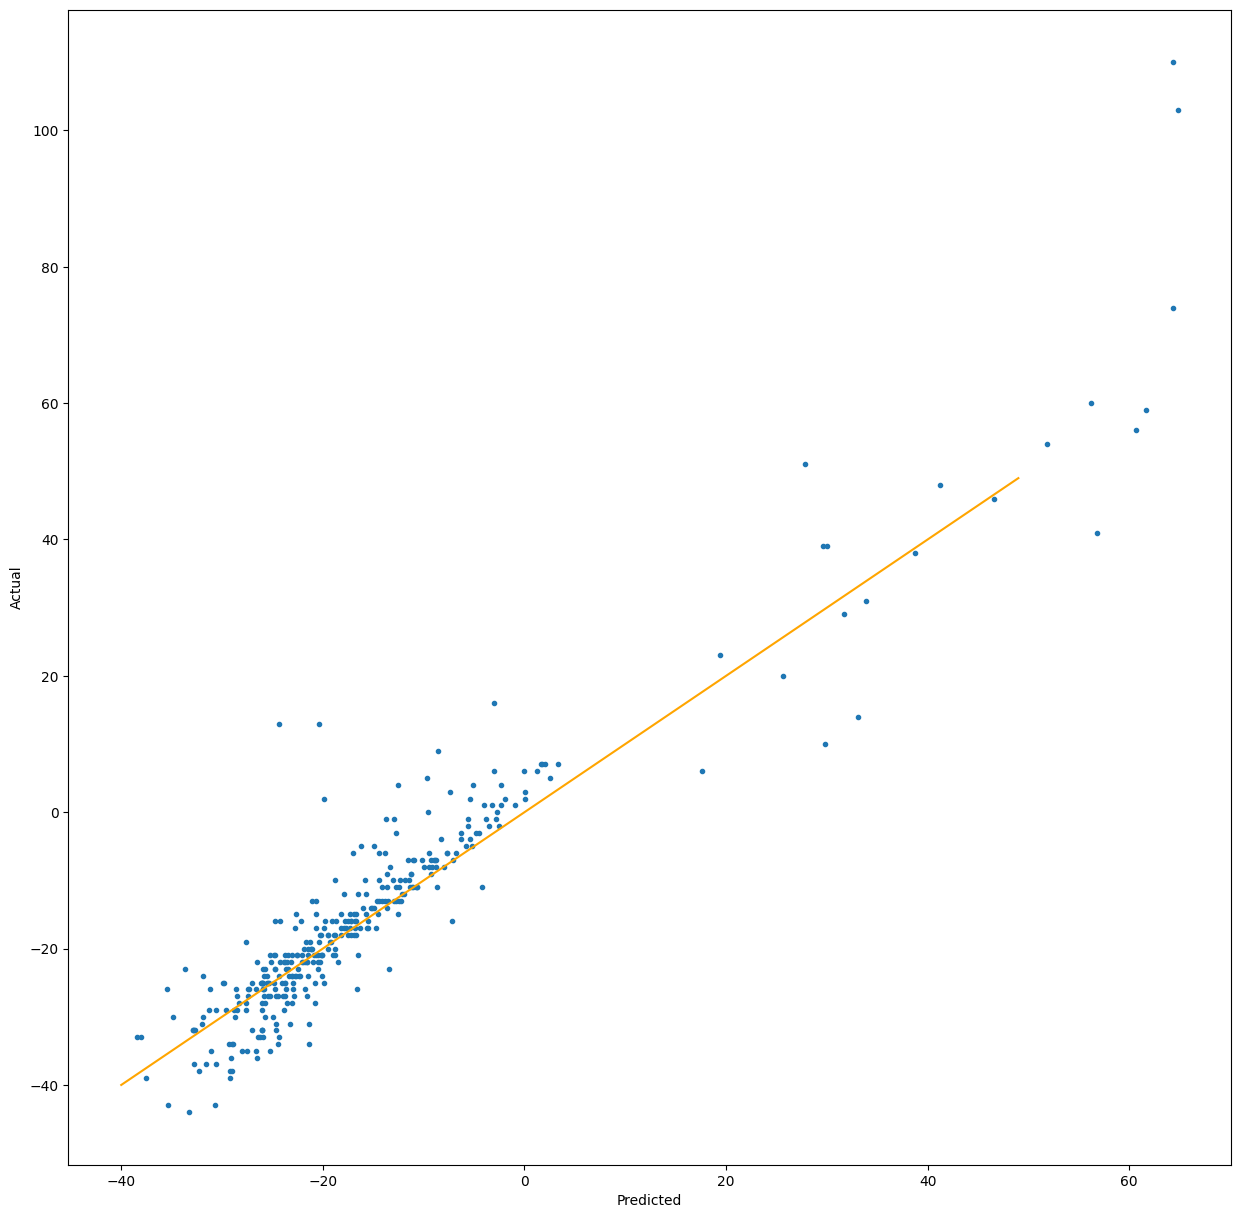

In [202]:
# PREDICTED VS ACTUAL GRAPH
# y = x line (ORANGE)

plt.figure(figsize=(15,15))
plt.plot(np.arange(-40,50),np.arange(-40,50), color = 'orange')
plt.scatter(g1,g2, marker = '.') # g1 is predicted, g2 is actual
plt.xlabel("Predicted")
plt.ylabel("Actual")

### Let us bring twitter data in the mix now!



We performed twitter analysis and made dataframes based on subjectivity and polarity in another notebook \
We bring those dfs and combine them to form a twitter augmented dataset

In [203]:
df_pol = pd.read_csv("pol.csv") 
df_sub = pd.read_csv("sub.csv") 
df_combined = pd.merge(df_indigo, df_pol, on=['month','day'])
df_combined= pd.merge(df_combined, df_sub, on=['month','day'])
df_final = pd.read_csv("volumefinal.csv") 
df_final=df_final.drop(['date','polarity','subjectivity'], axis=1)
df_combined= pd.merge(df_combined, df_final, on=['month','day'])


In [204]:
df_combined
df_combined = df_combined.drop(['day','month'], axis=1)


In [126]:
df_combined.columns


Index(['D_Airport Rating', 'D_Airport On Time Rating',
       'D_Airport Service Rating', 'A_Airport Rating',
       'A_Airport On Time Rating', 'A_Airport Service Rating', 'D_Delay',
       'Duration', 'A_Delay', 'C_Rating', 'C_Market Share', 'C_Load Factor',
       'C_On Time Performance Rating', 'D_DewPointC', 'D_WindGustKmph',
       'D_cloudcover', 'D_humidity', 'D_precipMM', 'D_pressure', 'D_tempC',
       'D_visibility', 'D_winddirDegree', 'D_windspeedKmph', 'D_Time',
       'A_DewPointC', 'A_WindGustKmph', 'A_cloudcover', 'A_humidity',
       'A_precipMM', 'A_pressure', 'A_tempC', 'A_visibility',
       'A_winddirDegree', 'A_windspeedKmph', 'A_Time', 'polarity',
       'subjectivity', 'tweet_volume'],
      dtype='object')

In [205]:
df_combined

,D_Airport Rating,D_Airport On Time Rating,D_Airport Service Rating,A_Airport Rating,A_Airport On Time Rating,A_Airport Service Rating,D_Delay,Duration,A_Delay,C_Rating,...,A_precipMM,A_pressure,A_tempC,A_visibility,A_winddirDegree,A_windspeedKmph,A_Time,polarity,subjectivity,tweet_volume
0,7.50,8.6,9.2,7.29,6.2,9.0,6.0,83.0,-26.0,7.9,...,0.0,1015.0,24.0,10.0,22.0,11.0,6.0,-0.025000,0.000000,1
1,7.00,8.5,8.7,7.99,7.3,9.1,3.0,122.0,-25.0,7.9,...,0.0,1019.0,16.0,10.0,152.0,5.0,8.0,-0.025000,0.000000,1
2,7.50,8.6,9.2,7.29,6.2,9.0,18.0,80.0,-18.0,7.9,...,0.0,1011.0,27.0,10.0,63.0,8.0,6.0,0.186667,0.530952,1
3,7.00,8.5,8.7,7.99,7.3,9.1,8.0,142.0,-1.0,7.9,...,0.0,1016.0,18.0,10.0,281.0,7.0,8.0,0.186667,0.530952,1
4,7.50,8.6,9.2,7.29,6.2,9.0,5.0,77.0,-33.0,7.9,...,0.0,1011.0,30.0,10.0,301.0,7.0,6.0,-0.128974,0.346154,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,7.00,8.5,8.7,7.99,7.3,9.1,16.0,112.0,-21.0,7.9,...,0.0,1001.0,37.0,10.0,280.0,24.0,8.0,-0.008864,0.394621,3
700,7.00,8.5,8.7,7.99,7.3,9.1,16.0,112.0,-21.0,7.9,...,0.0,1001.0,37.0,10.0,280.0,24.0,8.0,-0.008864,0.394621,3
701,7.99,7.3,9.1,8.27,7.8,9.0,29.0,107.0,6.0,7.9,...,0.0,1006.0,35.0,10.0,159.0,16.0,7.0,-0.008864,0.394621,3
702,7.99,7.3,9.1,8.27,7.8,9.0,29.0,107.0,6.0,7.9,...,0.0,1006.0,35.0,10.0,159.0,16.0,7.0,-0.008864,0.394621,3


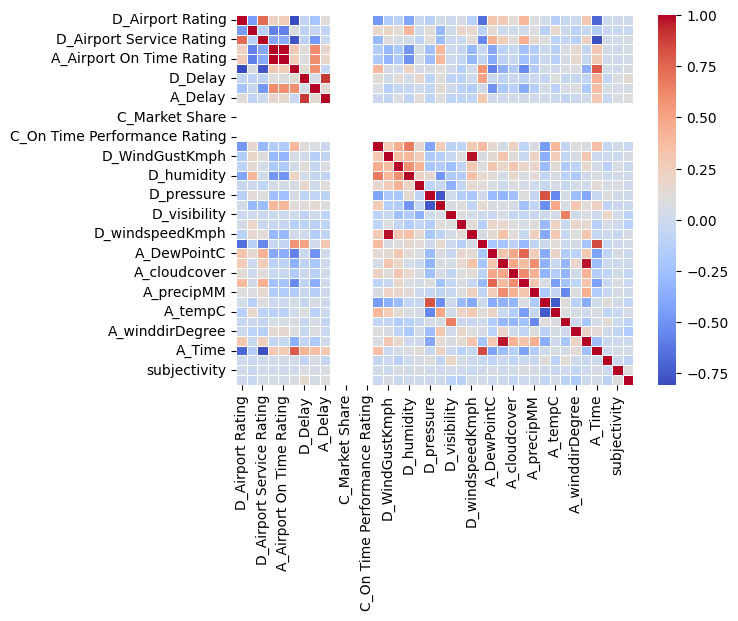

In [209]:
# Visualizations
plt.plot(figsize=(50,20))
corr_matrix = df_combined.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()


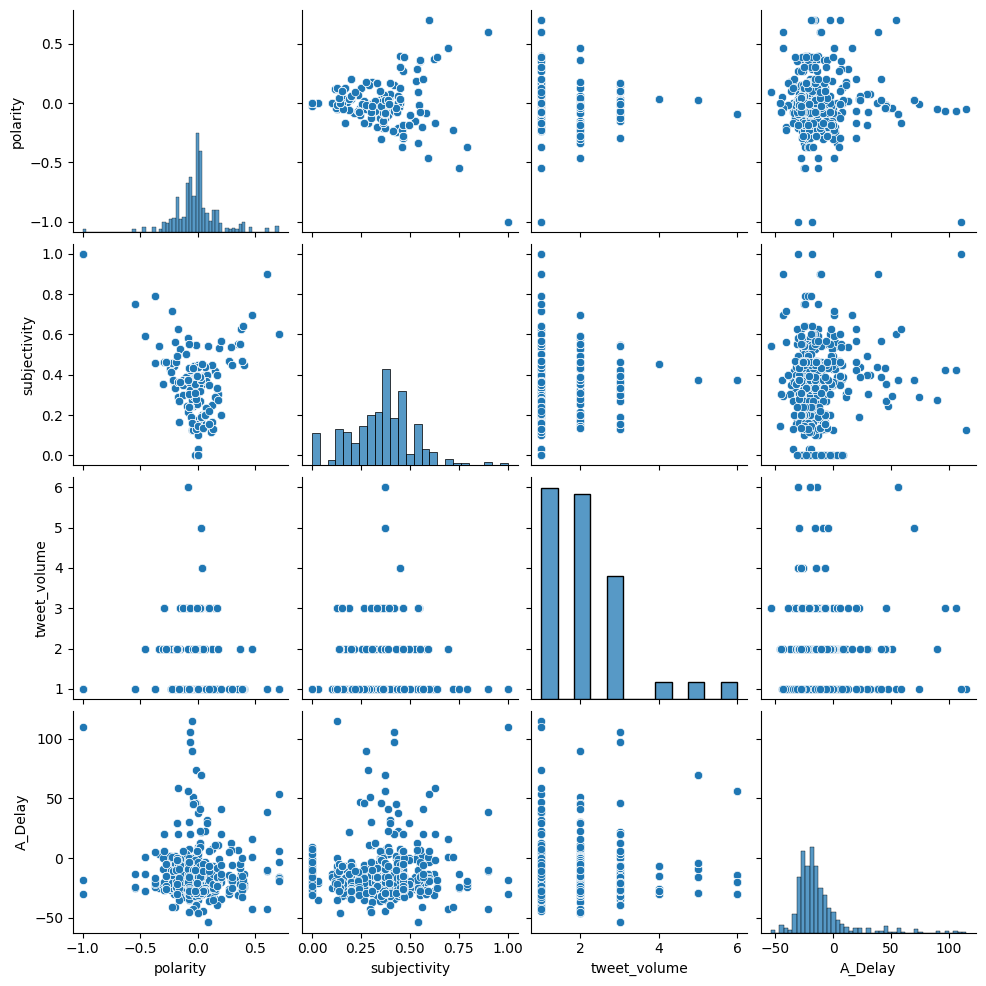

In [210]:
sns.pairplot(df_combined[['polarity', 'subjectivity', 'tweet_volume', 'A_Delay']])
plt.show()


### Now that we have our new dataset, we follow the same procedures to perform some predictions and produce a plot and mse

In [127]:
data = df_combined
PT = PowerTransformer(method = "yeo-johnson")
X_train,X_test,y_train,y_test = tts(data.drop('A_Delay', axis = 1),data['A_Delay'],test_size = 0.3,random_state = 1)

PT.fit(y_train.to_numpy().reshape(-1,1))
lamb = PT.lambdas_

yt_train = PT.transform(y_train.to_numpy().reshape(-1,1))
yt_test = PT.transform(y_test.to_numpy().reshape(-1,1))

In [128]:
RFR = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(X_train,yt_train)
print(mean_squared_error(RFR.predict(X_train),yt_train))
print(mean_squared_error(RFR.predict(X_test),yt_test))
print(X_train.shape)

0.04660868746762023
0.10715154709069037
(496, 37)


In [129]:
##Using SVM output in RFR
svr = SVR(kernel = 'poly',degree = 1, C = 1.0 , max_iter = 10000)
svr.fit(X_train,yt_train)
print(mean_squared_error(svr.predict(X_train),yt_train))
print(mean_squared_error(svr.predict(X_test),yt_test))

0.879348112377952
0.7209186751563393


In [130]:
X_train_svm = np.concatenate([X_train,svr.predict(X_train).reshape(-1,1)],axis = 1)
X_test_svm = np.concatenate([X_test,svr.predict(X_test).reshape(-1,1)],axis = 1)

data_svm = np.concatenate([X_train_svm,X_test_svm],axis = 0)

In [131]:
RFR = RandomForestRegressor(n_estimators = 500, min_samples_split = 20, max_features = n_feat,n_jobs = -1, random_state = 1)
RFR.fit(X_train_svm,yt_train)
print(mean_squared_error(RFR.predict(X_train_svm),yt_train))
print(mean_squared_error(RFR.predict(X_test_svm),yt_test))

0.1022040870971992
0.14664286754279077


In [132]:
g1 = PT.inverse_transform(RFR.predict(X_test_svm).reshape(-1,1)).reshape(-1,)
g2 = PT.inverse_transform(yt_test.reshape(-1,1)).reshape(-1,)

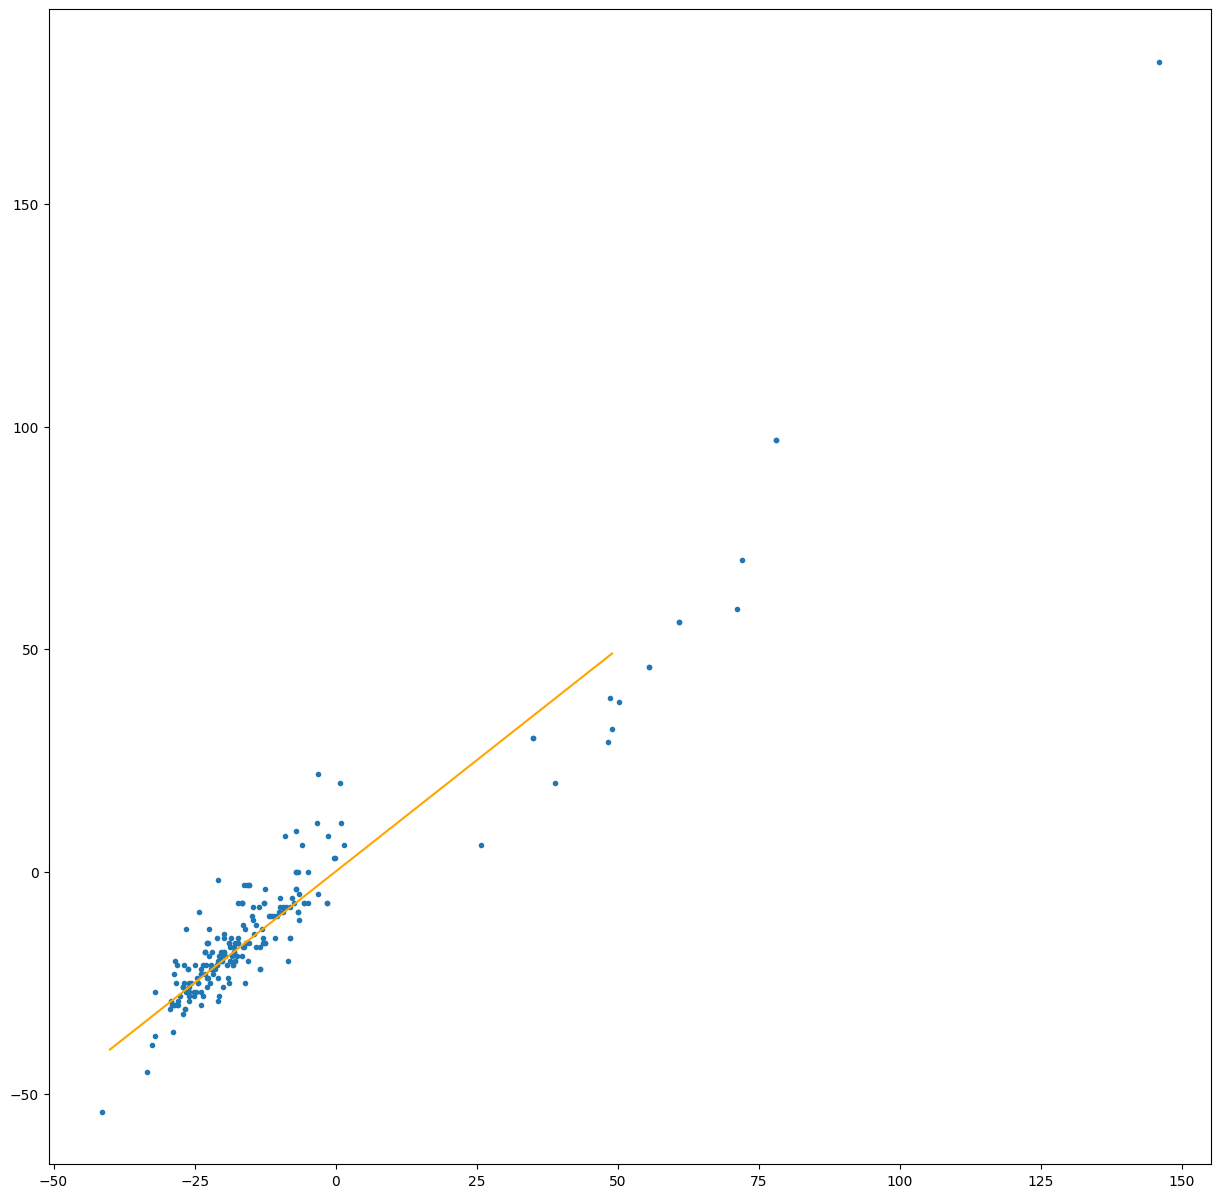

In [133]:
# LOOKING AT THE PREDICTIONS VISUALLY
# PREDICTED VS ACTUAL GRAPH
# y = x line (ORANGE)

plt.figure(figsize=(15,15))
plt.plot(np.arange(-40,50),np.arange(-40,50), color = 'orange')
plt.scatter(g1,g2, marker = '.')

In [135]:
# Final Results
data = {'Case': ['No Twitter', 'Twitter'],
        'Train MSE': [0.175, 0.089],
        'Test MSE': [0.290, 0.168]}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame 
df 


,Case,Train MSE,Test MSE
0,No Twitter,0.175,0.290
1,Twitter,0.089,0.168


# Future Scope
1) Analyze tweets as a function of time - timeseries. This can bring out valuable patterns relevant to time related changes.
2) Increase the data size and include year 2020, 2021
